In [1]:
import tf_data_and_model

In [2]:
x_train,y_train_one_hot,x_test,y_test_one_hot  = tf_data_and_model.load_data()
x_test_1, y_test_1  = tf_data_and_model.exclue_class(x_test, y_test_one_hot, excluded_cindex=[1, 3, 7])
x_test_2, y_test_2  = tf_data_and_model.exclue_class(x_test, y_test_one_hot, excluded_cindex=[2, 5, 8])
x_test_3, y_test_3  = tf_data_and_model.exclue_class(x_test, y_test_one_hot, excluded_cindex=[4,6,9])



Training data shape: (50000, 32, 32, 3) (50000, 1)
Testing data shape: (10000, 32, 32, 3) (10000, 1)


In [3]:
from tensorflow.keras.models import load_model

client_1_model = load_model("client_1.h5")
client_2_model = load_model("client_2.h5")
client_3_model = load_model("client_3.h5")

2025-06-06 23:52:28.874052: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2025-06-06 23:52:28.874074: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 18.00 GB
2025-06-06 23:52:28.874077: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 6.00 GB
I0000 00:00:1749228748.874088 9955350 pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
I0000 00:00:1749228748.874105 9955350 pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [4]:
def evaluate(model):

    _, accuracy137 = model.evaluate(x_test_1,y_test_1)
    _, accuracy258 = model.evaluate(x_test_2,y_test_2)
    _, accuracy469 = model.evaluate(x_test_3,y_test_3)


    print("test accuracy on [1,3,7]: " ,accuracy137)
    print("test accuracy on [2,5,8]: " ,accuracy258)
    print("test accuracy on [4,6,9]: " ,accuracy469)

In [5]:
evaluate(client_1_model)

2025-06-06 23:52:29.211244: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5334 - loss: 1.6074
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5329 - loss: 2.0310
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1356 - loss: 3.3931
test accuracy on [1,3,7]:  0.5372856855392456
test accuracy on [2,5,8]:  0.5295714139938354
test accuracy on [4,6,9]:  0.13842856884002686


In [6]:
evaluate(client_2_model)

219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.1284 - loss: 3.4591
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5188 - loss: 1.9941
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5211 - loss: 1.8035
test accuracy on [1,3,7]:  0.12885713577270508
test accuracy on [2,5,8]:  0.5238571166992188
test accuracy on [4,6,9]:  0.5238571166992188


In [7]:
evaluate(client_3_model)

219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.1284 - loss: 3.4591
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5188 - loss: 1.9941
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5211 - loss: 1.8035
test accuracy on [1,3,7]:  0.12885713577270508
test accuracy on [2,5,8]:  0.5238571166992188
test accuracy on [4,6,9]:  0.5238571166992188


In [8]:
predicted = client_1_model.predict(x_test_1)

219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


predicted :  6
y_test_1 :  8


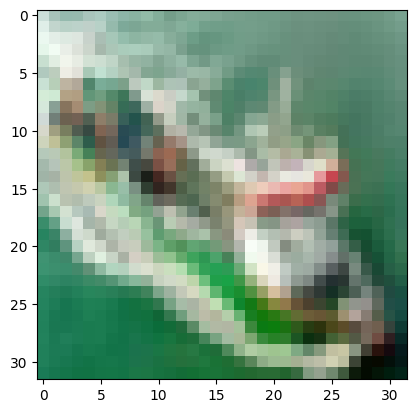

In [10]:
import matplotlib.pyplot as plt 
import numpy as np
idx = 10

print("predicted : ",np.argmax(predicted[idx]))
print("y_test_1 : ",np.argmax(y_test_1[idx]))
plt.imshow(x_test_1[idx])